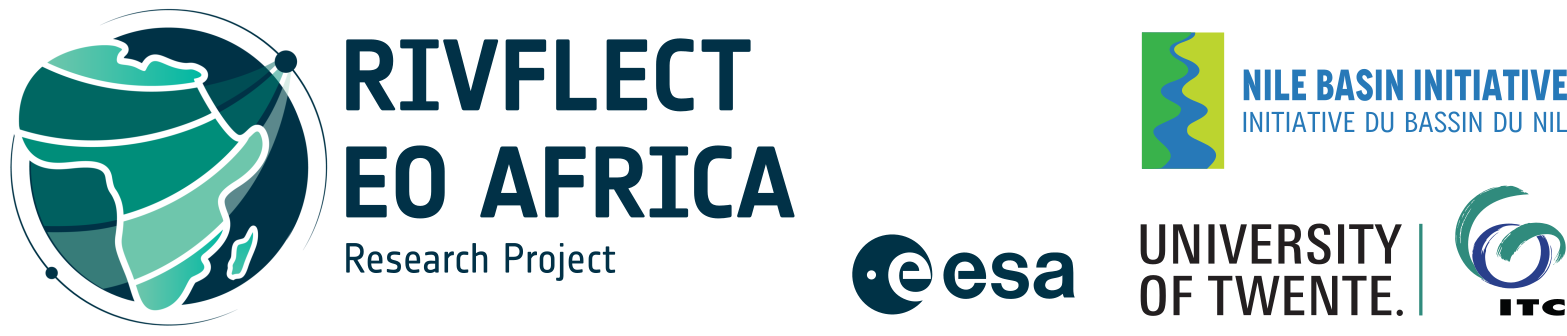

# Notebook to plan and design the GNSS-R dployment at site X (File to be renamed)

Zeleke Challa, Roelof Rietbroek, Sept 2023


In [ ]:
#only need to be run once to install some gnss tools from the project ()
!pip install git+https://github.com/ITC-Water-Resources/gnssr4water.git

In [1]:
import geopandas as gpd
from gnssr4water.fresnel.getorbits import retrieve_orbits,read_sp3
from gnssr4water.fresnel.iterfresnel import reflZone
from gnssr4water.fresnel.geod import elevazim
from gnssr4water.fresnel.plotfresnel import fresnelMap
from datetime import datetime

In [2]:
# load hydromet stations
hydrometshapef='data/HydroMet_Locations'
hydromdf=gpd.read_file(hydrometshapef)
display(hydromdf)

,OBJECTID,No_,Country,Stations,Station_ID,Latitude,Longitude,geometry
0,1,1,BURUNDI,Ruvubu at Gitega,BUR_002_Hyd,-3.349600,29.984900,POINT (29.98490 -3.34960)
1,2,2,BURUNDI,Ruvubu at Muyinga,BUR_001_Hyd,-2.987900,30.464500,POINT (30.46450 -2.98790)
2,3,3,KENYA,Nzoia Ruambwa,KEN_001_Hyd - 1EF01,0.123300,34.090800,POINT (34.09080 0.12330)
3,4,4,KENYA,Yala Kadenge,KEN_002_Hyd - 1FG03,-0.002120,34.140000,POINT (34.14000 -0.00212)
4,5,5,KENYA,Nyando Ogilo,KEN_003_Hyd - 1GD03,-0.125660,34.999900,POINT (34.99990 -0.12566)
5,6,6,KENYA,Miriu Sondu,KEN_004_Hyd - 1JG04,-0.354410,34.805500,POINT (34.80550 -0.35441)
6,7,7,KENYA,Gucha Migori,KEN_005_Hyd - 1KB05,-0.950030,34.209700,POINT (34.20970 -0.95003)
7,8,8,KENYA,Mara,KEN_006_Hyd - 1LA04,-1.224300,35.035900,POINT (35.03590 -1.22430)
8,9,9,RWANDA,Gakindo Lac Rweru,RWA_001_Hyd,-2.343660,30.301500,POINT (30.30150 -2.34366)
9,10,10,RWANDA,Gihinga,RWA_002_Hyd,-2.286430,29.669690,POINT (29.66969 -2.28643)


In [4]:
# select a station to consider
Entebbestat=hydromdf[hydromdf.Station_ID == 'NBI_001_Hyd']
lon=Entebbestat.geometry.x.item()
lat=Entebbestat.geometry.y.item()
receiverh=4 #meter above water surface
print(f"Lon:{lon}, lat:{lat}, receiverheight:{receiverh}")

Lon:32.47274200000004, lat:0.04820300000005773, receiverheight:4


In [5]:
# get some reference GPS orbits
orb = retrieve_orbits(datetime(2023,9,8))
df_sp3 = read_sp3(orb)

 # Calculate elevation and azimuth
df_sp3 = elevazim(df_sp3,lon,lat,receiverh)

# Remove all values below 0° elevation, i.e satellites that are not visible
df_sp3 = df_sp3[df_sp3['elevation'] > 0]

display(df_sp3)

File already exists


/home/eoafrica/gnssr4water/gnssr4water/fresnel/geod.py:215: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  df = df.astype({'week':'int','system':'str','tow':'float','clock':'float','azimuth':'int', 'elevation':'int','PRN':'int','date':'datetime64'})


,PRN,week,date,tow,clock,system,elevation,azimuth
0,13,2278,2023-09-08 18:00:00,496800.0,570.125879,GPS,31,345
1,22,2278,2023-09-08 18:00:00,496800.0,125.703480,GPS,38,3
3,7,2278,2023-09-08 18:00:00,496800.0,72.814242,GPS,8,70
4,5,2278,2023-09-08 18:00:00,496800.0,-141.948790,GPS,35,272
5,20,2278,2023-09-08 18:00:00,496800.0,412.921637,GPS,41,231
...,...,...,...,...,...,...,...,...
10162,8,2279,2023-09-10 17:00:00,61200.0,-72.486430,GLONASS,63,157
10164,7,2279,2023-09-10 17:00:00,61200.0,64.360141,GLONASS,13,155
10165,2,2279,2023-09-10 17:00:00,61200.0,-22.431527,GLONASS,5,335
10169,21,2279,2023-09-10 17:00:00,61200.0,-37.029398,GLONASS,15,87


In [6]:
# create fresnel zones
reflZone(receiverh, [5,10,15],lon,lat,df_sp3=df_sp3)

File Fresnel[5, 10, 15]_4.gpkg successfully created in FresnelZones


,ID,azimuth,elevation,area,geometry
0,0,17,5,357.523929,"POLYGON ((32.47299 0.04901, 32.47299 0.04901, ..."
1,1,19,5,357.523929,"POLYGON ((32.47302 0.04900, 32.47302 0.04900, ..."
2,2,26,5,357.523929,"POLYGON ((32.47311 0.04896, 32.47311 0.04896, ..."
3,3,30,5,357.523929,"POLYGON ((32.47317 0.04894, 32.47316 0.04894, ..."
4,4,33,5,357.523929,"POLYGON ((32.47320 0.04891, 32.47320 0.04891, ..."
...,...,...,...,...,...
218,218,337,15,37.313164,"POLYGON ((32.47266 0.04839, 32.47266 0.04839, ..."
219,219,338,15,37.313164,"POLYGON ((32.47266 0.04840, 32.47266 0.04839, ..."
220,220,339,15,37.313164,"POLYGON ((32.47267 0.04840, 32.47267 0.04840, ..."
221,221,340,15,37.313164,"POLYGON ((32.47267 0.04840, 32.47267 0.04840, ..."


In [ ]:
# %matplotlib inline
fileFres=f"FresnelZones/Fresnel[5, 10, 15]_{receiverh}.gpkg"
fresnelMap(lon,lat,dist=60,filezone=fileFres)